In [13]:
#this is an example using picograd to train a fully-connected classifier on the MNIST data
import sys
import matplotlib.pyplot as plt
from picograd.Tensor import *
from picograd.nn import Linear, ReLU, LogSoftmax, Dropout
from picograd.Loss import NLLLoss
from picograd.optim import SGD, Adam
from MNIST_Helper import *
from Model_Eval import *

In [14]:
#defining network - following PyTorch structure. One of the network architectures used in original dropout paper
class Network():
    def __init__(self):
        self.fc1 = Linear(784, 800, bias=True)
        self.fc2 = Linear(800, 800, bias=True)
        self.fc3 = Linear(800, 10)
        self.dropout = Dropout(p=0.5)
        self.logsoftmax = LogSoftmax()
        self.relu = ReLU()

    def forward(self, input):
        x = self.relu(self.fc1(input))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return self.logsoftmax(x, 1)

    def parameters(self):

        return [self.fc1.weights, self.fc2.weights, self.fc3.weights, self.fc1.bias, self.fc2.bias,
                self.fc3.bias]

    def eval(self):
        self.dropout.p = 0

In [18]:
#Initializing model, loss, optimizer
model = Network()
optimizer = Adam(model.parameters())
criterion = NLLLoss()

In [19]:
#getting train/test data
X_train, Y_train, X_test, Y_test = fetch_mnist()

#Normalizing data. Default MNIST is not normalized
X_train, X_test = X_train / 255-0.5, X_test / 255-0.5

# Creating train dataloader
trainloader = MNISTloader(X_train, Y_train, batch_size=64)

In [20]:
#Training

epochs = 15
losses = []

for i in range(0, epochs):
    running_loss = 0

    # Need to reset iterator every epoch
    trainloader.iter = 0
    for images, labels in trainloader:

        optimizer.zero_grad()

        out = model.forward(images)

        loss = criterion(out, labels)

        loss.backward()

        running_loss += loss.value

        optimizer.step()

    if i % 2 == 0:
        print('Running Loss:', running_loss/len(trainloader))

    losses.append(running_loss/len(trainloader))

Running Loss: 1.039255273984616
Running Loss: 0.34961645508715794
Running Loss: 0.25055601498312857
Running Loss: 0.20117601402016433
Running Loss: 0.1649205008404391
Running Loss: 0.14236284474163388
Running Loss: 0.12944530726687759
Running Loss: 0.11526339192921445


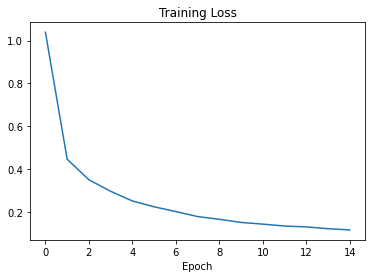

In [25]:
trainloader.iter = 0
plt.title('Training Loss')
plt.plot(range(0, epochs), losses)
plt.xlabel('Epoch')
plt.show()

In [26]:
testloader = MNISTloader(X_test, Y_test, batch_size=64)
testloader.iter = 0
model.eval()
print('Test Loss:')
eval_acc(model, testloader)
print('Training Loss:')
eval_acc(model, trainloader)

Test Loss:
Accuracy: 97.27564102564102 %
Training Loss:
Accuracy: 97.7754802561366 %
